In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

In [2]:
data=pd.read_csv("Data_sets/boston_house_prices.csv",skiprows=1)

In [3]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [6]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          B  LSTAT  MEDV  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9

In [7]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.shape

(506, 14)

In [10]:
data.size

7084

In [11]:
data.ndim

2

In [12]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [13]:
pandas_profiling.ProfileReport(data)

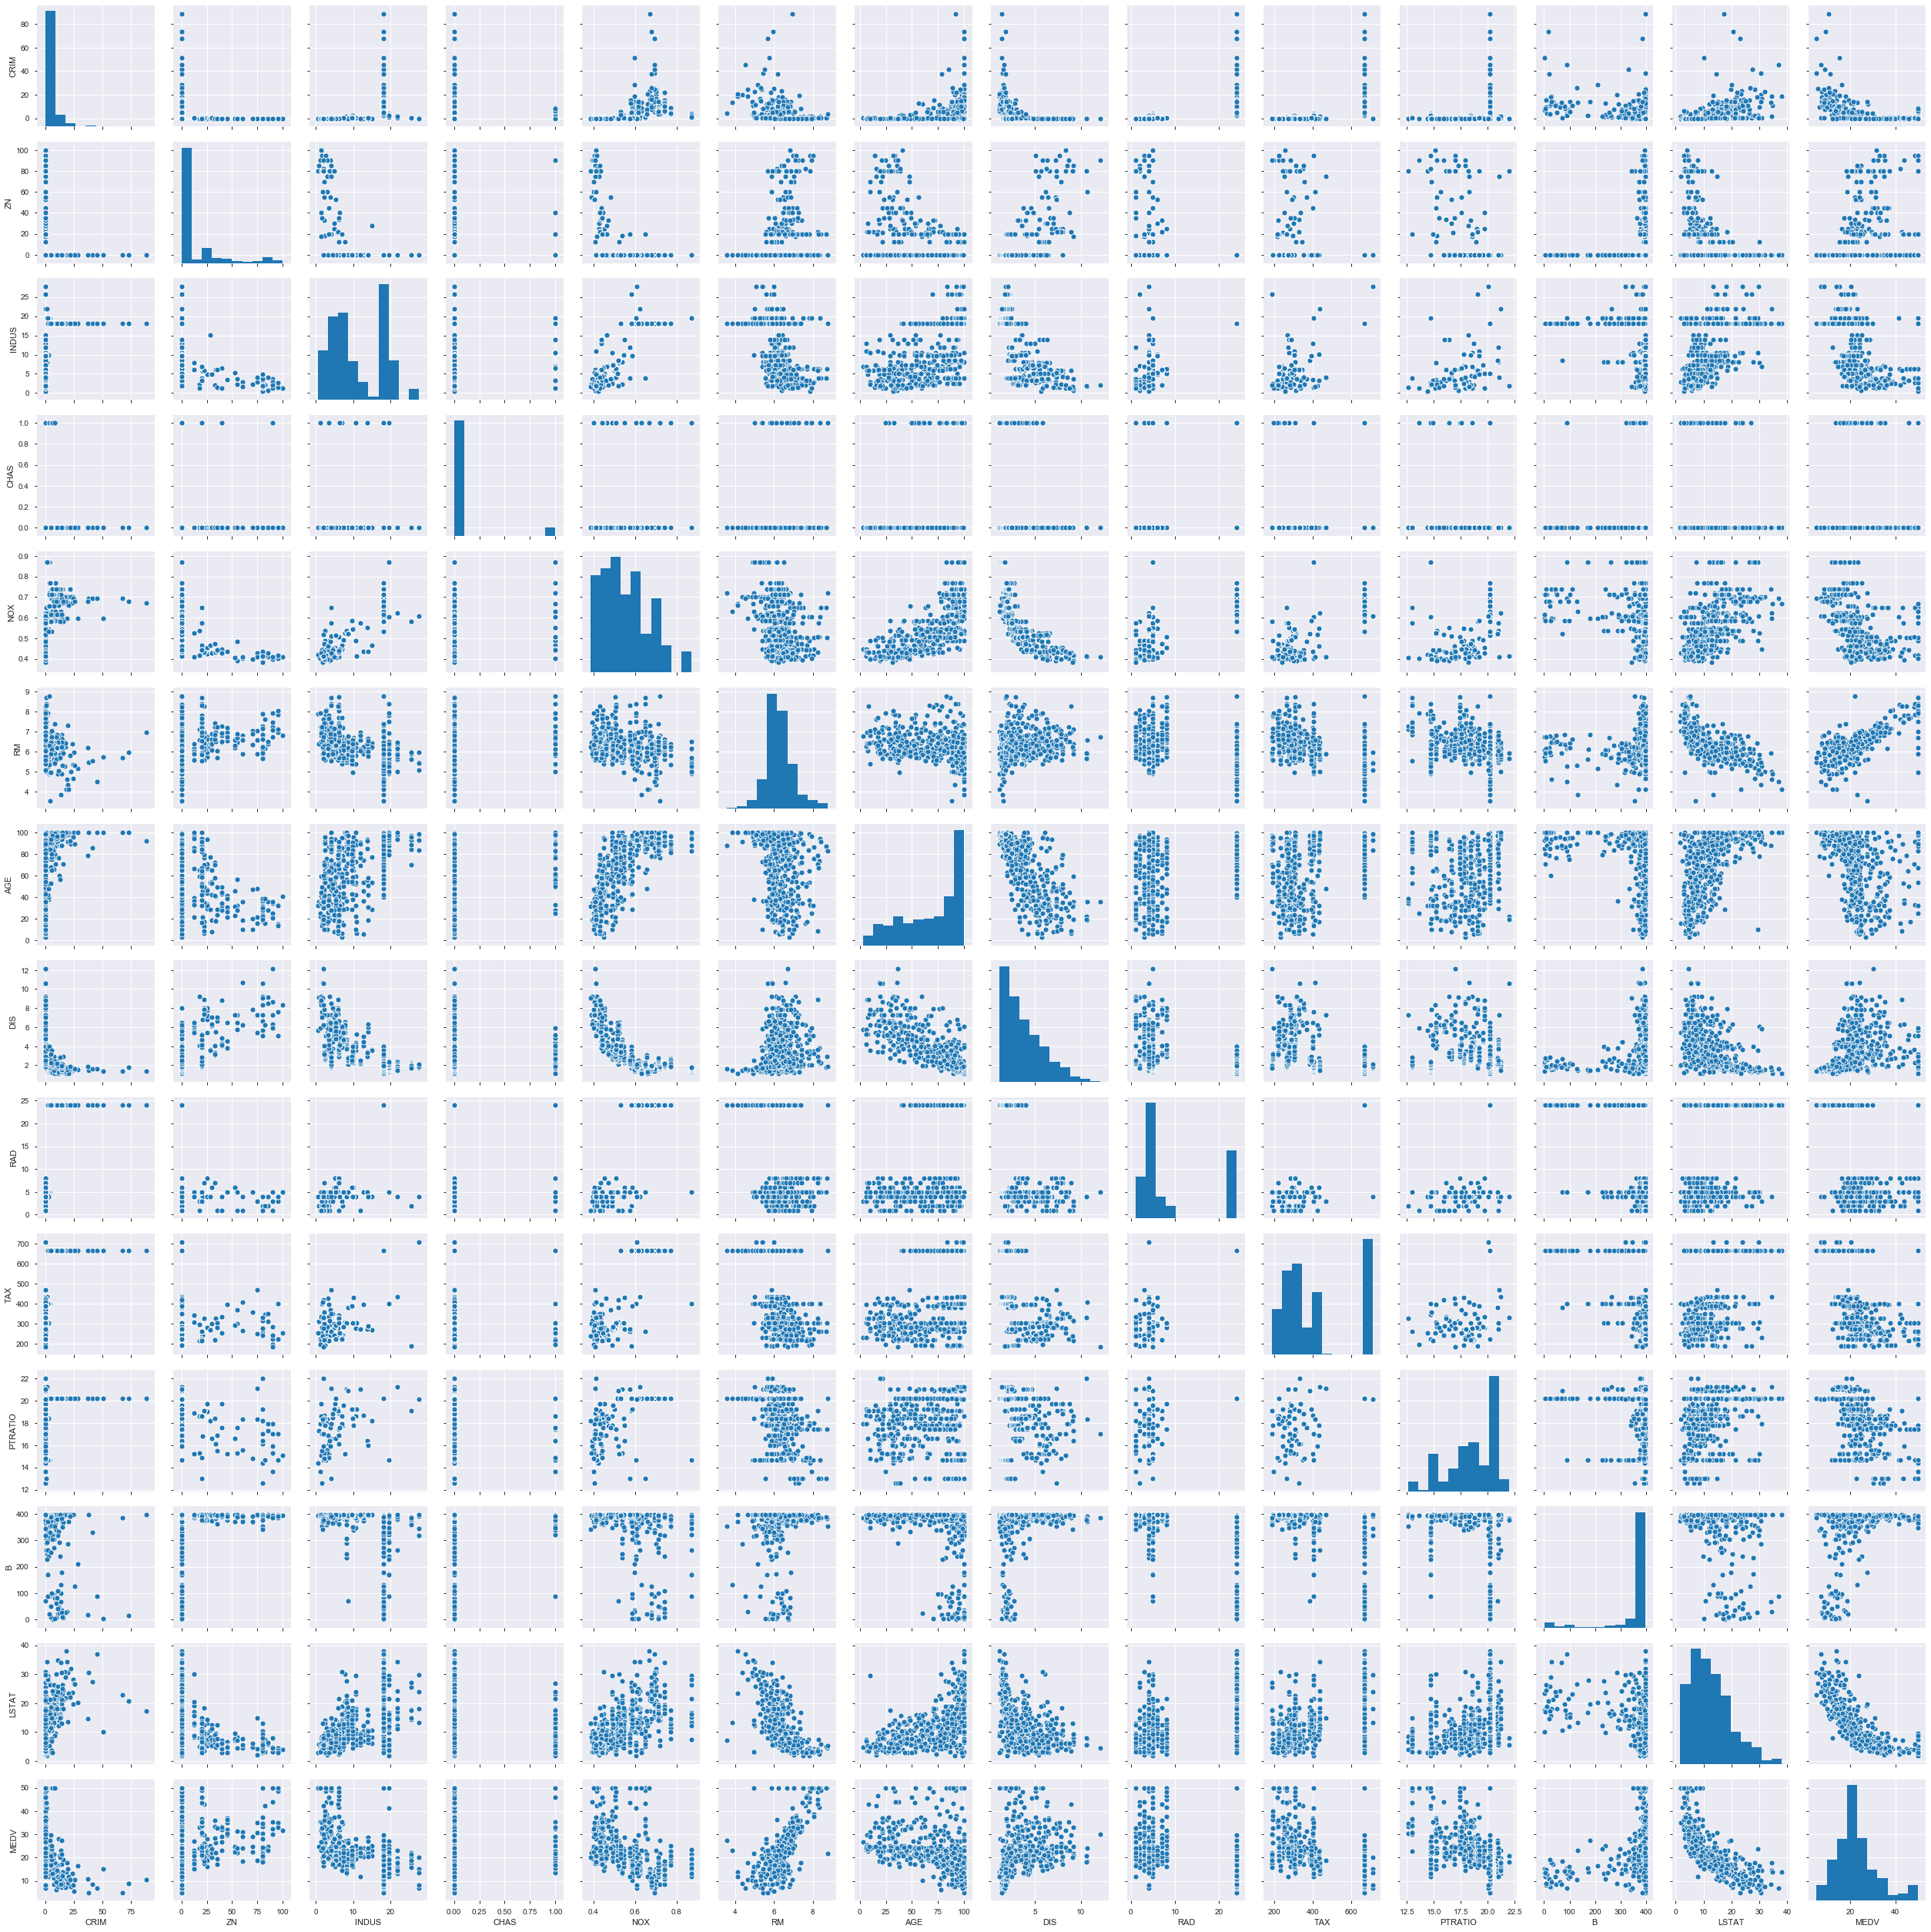

In [14]:
sns.pairplot(data)

In [15]:
Y_data = data['MEDV']
Y_data

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [16]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [17]:
X_data = data.drop(['CHAS','TAX'],axis=1)
X_data.head()

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD  PTRATIO       B  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1     15.3  396.90   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2     17.8  396.90   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2     17.8  392.83   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3     18.7  394.63   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3     18.7  396.90   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression(normalize=True)

In [20]:
lr.fit(X_data,Y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test= train_test_split(X_data, Y_data, test_size=0.25)

In [23]:
X_test.shape

(127, 12)

In [24]:
X_train.shape

(379, 12)

In [25]:
Y_test.shape

(127,)

In [26]:
Y_train.shape

(379,)

In [27]:
Tr = lr.score(X_train,Y_train)
Tr

1.0

In [28]:
Te = lr.score(X_test,Y_test)
Te

1.0

In [29]:
New_prediction=lr.predict(X_test)
New_prediction

array([27. , 22.9, 20.6, 19.6, 24.1, 14.1, 48.3, 17.5, 15.6, 13.9, 16.3,
       50. , 22.2, 12.6, 29. , 23.1, 17.2, 15. , 33.1, 12.1, 12. , 22.3,
       23.1, 21.7, 31.5, 27.5, 13.8, 18.7, 13.1, 19.3, 21.9, 25. , 23.6,
       30.1, 23. , 11.8, 36.2, 50. , 15.2, 13.3, 14.4, 12.7, 13.3, 13.2,
       22.4, 19.9, 18.4, 21.1, 26.2, 28.4, 25.1,  9.7, 28.5, 23. , 16.4,
       17.2, 23.8, 24.8, 24.8,  9.5, 30.1, 21. , 50. , 23.7,  9.6, 29.1,
       33.4, 20.3, 22.2, 23.2, 19.7, 50. , 22.6, 19. , 20.2, 20. , 10.2,
        8.8, 30.5, 27.5, 44. , 22.1, 20.6, 28.7, 44.8, 32.2,  8.5, 26.6,
       22. , 23.9, 14.9, 13.4, 21.7, 22.6, 21.6, 34.6, 23.1, 20.3, 31.5,
       22.4,  7.5, 26.7, 42.8, 20.6, 19.6, 27.5, 18.9, 24. , 17.8, 21.7,
       18.5, 24.4, 12.7, 48.8, 21.4, 50. ,  7.2, 10.8, 17.4, 14.1, 16.8,
       21.4, 19.8, 18.9, 21.7, 23.8, 12.8])

In [30]:
New_prediction.shape

(127,)

In [31]:
df=pd.DataFrame({'Actual_Data':Y_test,
                'New_predict':New_prediction})
df

Actual_Data  New_predict
160         27.0         27.0
92          22.9         22.9
355         20.6         20.6
131         19.6         19.6
74          24.1         24.1
..           ...          ...
317         19.8         19.8
11          18.9         18.9
357         21.7         21.7
168         23.8         23.8
439         12.8         12.8

[127 rows x 2 columns]

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
mean_absolute_error(New_prediction, Y_test)

2.1162424393799835e-14

In [37]:
r2_score(New_prediction, Y_test)

1.0

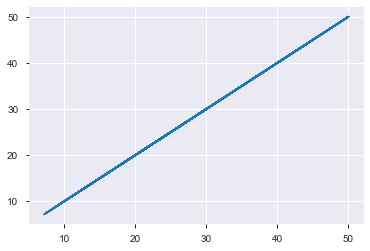

In [39]:
plt.plot(New_prediction, Y_test)